### 데이터 불러오고 train test 분리

In [18]:

import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
data= pd.read_csv("../datasets/재무데이터/DB최종재무데이터(0702).csv", encoding="cp949")
data.sort_values(by=["거래소코드","회계년도"], inplace=True)
# 
# df.drop(["EDF","K1_Score"], axis=1, inplace=True)

#Train은 2008년부터 ~~ 2017년까지
# test가 2018년 부터 2020년까지
# column_list=['자기자본비율', '유동비율', '당좌비율', '부채비율', '차입금의존도', '이자보상배율',
#        '매출총이익률', '영업이익률', '당기순이익률', 'ROA', 'ROE', '재고자산회전율', '매출채권회전율',
#        '총자산회전율', '매입채무회전율', '매출액증가율', '유형자산증가율', '총자산증가율']
# column_list=['자산', '부채', '자본', '매출액', '매출원가', '매출총이익',
#        '영업이익', '당기순이익', '유동자산', '당좌자산', '재고자산', '유동부채', '비유동부채', '매출채권',
#        '매입채무', '단기차입금', '장기차입금', '사채', '유형자산', '이익잉여금', '이자비용',
#        '영업활동으로 인한 현금흐름', '투자활동으로 인한 현금흐름', '재무활동으로 인한 현금흐름', '이자수익', '법인세비용',
#        '지분법이익', '지분법손실', '자기자본비율', '유동비율', '당좌비율', '부채비율', '차입금의존도', '이자보상배율',
#        '매출총이익률', '영업이익률', '당기순이익률', 'ROA', 'ROE', '재고자산회전율', '매출채권회전율',
#        '총자산회전율', '매입채무회전율', '매출액증가율', '유형자산증가율', '총자산증가율', '현금순환주기']
column_list=['영업이익', '당기순이익', '매입채무', '사채', '이익잉여금', '영업활동으로 인한 현금흐름', '투자활동으로 인한 현금흐름', '이자수익', '지분법손실', '자기자본비율', 
             '유동비율', '당좌비율', '매출총이익률', '영업이익률', 'ROA', '총자산회전율', '현금순환주기','이자비용']

X = data[column_list]
st = StandardScaler()
X= st.fit_transform(X)
X=pd.DataFrame(X, columns=column_list)
df_08_17 = X[data['회계년도'].isin([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])] #train/test
df_18_20 = X[data['회계년도'].isin([2018,2019,2020])] #validate
y = data['부도']
y_08_17=y[data['회계년도'].isin([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])] #train/test
y_18_20 = y[data['회계년도'].isin([2018,2019,2020])]#validate
X_train=df_08_17
X_test=df_18_20
y_train=y_08_17
y_test =y_18_20


# 부도열 1인 친구랑 0인 친구로 따로 데이서 셋으로 나눈다음에 변수명 2개로 
# # 오버샘플링
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(ratio=auto, kind='regular')
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
# print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
# print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
# print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )


### 랏쏘 피쳐 셀렉션

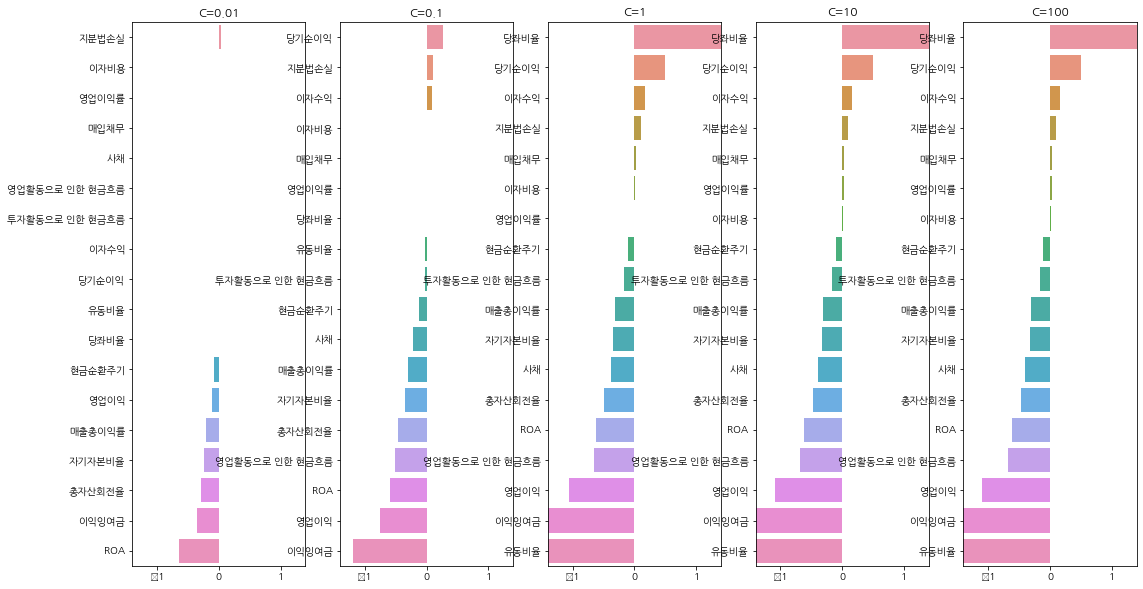

,C=0.01,C=0.1,C=1,C=10,C=100
영업이익,-0.117475,-0.748719,-1.060810,-1.090143,-1.093520
당기순이익,0.000000,0.260081,0.489727,0.500628,0.501728
매입채무,0.000000,0.000000,0.028119,0.032029,0.032501
사채,0.000000,-0.217166,-0.382833,-0.396801,-0.398242
이익잉여금,-0.357078,-1.186400,-1.393526,-1.399449,-1.400089
영업활동으로 인한 현금흐름,0.000000,-0.512335,-0.657911,-0.677708,-0.679843
투자활동으로 인한 현금흐름,0.000000,-0.032885,-0.164001,-0.169282,-0.169874
이자수익,0.000000,0.087587,0.167213,0.163617,0.163151
지분법손실,0.036565,0.101117,0.103438,0.101381,0.101123
자기자본비율,-0.232404,-0.353004,-0.345102,-0.329204,-0.327460


In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,  LogisticRegression, Ridge, Lasso, ElasticNet
plt.rcParams['font.family'] = 'NanumGothic'
alphas = [0.01, 0.1,  1 , 10 , 100]
coeff_df_lasso = pd.DataFrame()
fig , axs = plt.subplots(figsize=(18,10) , nrows=1 , ncols=5)
for pos , alpha in enumerate(alphas):
    lasso =LogisticRegression(solver='liblinear',penalty='l1',C=alpha, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           random_state=None, tol=0.0001,
          verbose=0, warm_start=False)
    model=lasso.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=model.coef_[0], index=X.columns )
    colname='C='+str(alpha)
    coeff_df_lasso[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1.4,1.4)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()
coeff_df = pd.DataFrame()
lasso = LogisticRegression(solver='liblinear',penalty='l1',C=1)
model=lasso.fit(X_train , y_train)
coeff = pd.Series(data=model.coef_[0] , index=X_train.columns )
#coeff2=abs(coeff)

coeff_df_lasso

### 릿지 피쳐 셀렉션

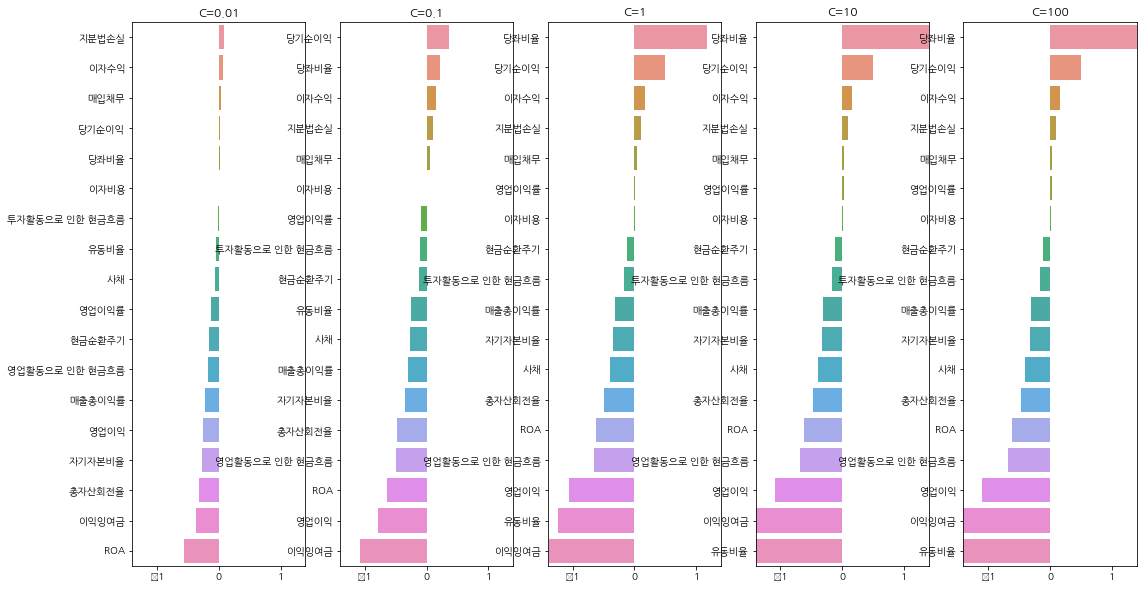

,C=0.01,C=0.1,C=1,C=10,C=100
영업이익,-0.258175,-0.788361,-1.051523,-1.089293,-1.093453
당기순이익,0.024159,0.357680,0.495336,0.502866,0.501955
매입채무,0.028762,0.055355,0.039227,0.033541,0.032672
사채,-0.059825,-0.274066,-0.386603,-0.397989,-0.398329
이익잉여금,-0.367904,-1.077712,-1.380818,-1.401738,-1.400294
영업활동으로 인한 현금흐름,-0.168021,-0.497960,-0.649409,-0.676107,-0.679703
투자활동으로 인한 현금흐름,-0.011561,-0.101200,-0.161612,-0.169294,-0.169894
이자수익,0.064866,0.155549,0.173162,0.165666,0.163316
지분법손실,0.090027,0.104428,0.104073,0.101706,0.101147
자기자본비율,-0.273658,-0.348446,-0.349387,-0.332211,-0.327715


In [20]:
alphas = [0.01, 0.1,  1 , 10 , 100]
coeff_df_ridge = pd.DataFrame()
fig , axs = plt.subplots(figsize=(18,10) , nrows=1 , ncols=5)
for pos , alpha in enumerate(alphas):
    lasso =LogisticRegression(solver='liblinear',penalty='l2',C=alpha)
    model=lasso.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=model.coef_[0], index=X.columns )
    colname='C='+str(alpha)
    coeff_df_ridge[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1.4,1.4)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()
lasso = LogisticRegression(solver='liblinear',penalty='l1',C=alpha)
model=lasso.fit(X_train , y_train)
coeff_df_ridge